### Mr. Alejandro Banderas, a successful celebrity masterchef and owner of three Michelin 3-star restaurant chains of "Dadadon" in New York City., is looking to set up a new chain in another state. "Dadadon" opens for lunch and dinner, specializes in Spanish cuisines and uses some of the finest fresh ingredients. The secret to its succulent signature rice dish, Paella de Marisco, contains chicken, seafood and beans of the highest quality.

**_Objective:_** We shall generate a list of suitable states in the U.S. to set up the new chain. For this purpose, four main key factors of a state are considered: 
1. **_Quality of life_** --- The ability to appreciate exquisite foreign cuisines typically implies a certain level of living standards. Two key quality-of-life indicators that measure how well societies progress are the Human Development Index (HDI) and the Genuine Progress Indicator (GPI). These two measures in the suitable list of American states should be similar to NY.

2. **_High-tech workforce_** --- "Dadadon" belongs to the class of moderately to highly luxurious restaurants, and therefore should situate in an American state similar to NY with enough affluent customers to patronize the new chain. This generally necessitates a substantial population, the existence of relatively high employment rate in professional, financial and health private sectors, and well-connected public transportation.

3. **_Crime rate_** --- Security is also an obvious social factor that must be accounted for to ensure a safe and steady business. Thus the candidate states must have a crime-rate profile similar to that of NY

4. **_Support for wholesaler industries_** --- Alejandro is demanding when it comes to the selection of ingredients for "Dadadon". It is therefore important that the American state should also support wholesale industries for grains, beans, seafood, meat and vegetables. This time, in order to minimize express wholesale transportation costs, Alejandro prefers that the final state should possess thriving wholesaler industries. 

**_Data_:** Here are the list of datasets used for the analysis:

1. 2017 HDI table extracted from Wikipedia
2. 2017 GPI table extracted from Ecological Economics **147**, 29 (2018)
3. 2017 Labor Market Data obtained from the Bureau of Labor Statistics (BLS)
4. 2014 Crime Data obtained from the Federal Bureau of Investigation (FBI). 

**_Methods_:** The procedures to analyze the above datasets after 
preprocessing are listed below:

1. Employ K-means clustering technique to group states according to quality of life, 
   high-tech workforce strength and crime rate.
2. Obtain the cluster containing NY and sort the clustered states in descending
   order of support for agricultural, fishery, hunting and wholesaler industries.
3. A Marked choropleth map and bar chart are used to visualize the results. 

### Load required libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#!pip install bs4
from urllib.request import urlopen
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


### Get Latitudes and Longitudes of all 50 states.

In [2]:
html = urlopen("https://inkplant.com/code/state-latitudes-longitudes")
bs_src = BeautifulSoup(html.read(),'lxml');
xml_table = bs_src.find('table',{'class':'table table-hover'})

table=pd.DataFrame([])

rows = xml_table.find_all('tr')
for row in rows:
    cols=row.find_all('td')
    cols=[x.text.strip() for x in cols]
    table=pd.concat([table,pd.DataFrame([cols])],axis=0)

headers = table.iloc[0] #grab the first row for the header
table = table[1:] #take the data less the header row
table.columns = headers 
table.reset_index(drop=True, inplace=True)
table['Latitude'] = table['Latitude'].astype(float)
table['Longitude'] = table['Longitude'].astype(float)
print(table.loc[32])
print(table.shape)
table

0
State        New York
Latitude      42.1657
Longitude    -74.9481
Name: 32, dtype: object
(51, 3)


,State,Latitude,Longitude
0,Alabama,32.806671,-86.791130
1,Alaska,61.370716,-152.404419
2,Arizona,33.729759,-111.431221
3,Arkansas,34.969704,-92.373123
4,California,36.116203,-119.681564
5,Colorado,39.059811,-105.311104
6,Connecticut,41.597782,-72.755371
7,Delaware,39.318523,-75.507141
8,District of Columbia,38.897438,-77.026817
9,Florida,27.766279,-81.686783


### Load and view State Crime Data from compiled CSV based on 2014 UCR Online Data at the FBI page

In [3]:
UScrimes=pd.read_csv('https://raw.githubusercontent.com/ringtape/Coursera_Capstone/master/USCrime2014.csv')
print(UScrimes.shape)
UScrimes.head()

(51, 22)


,State,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate
0,Alabama,4849377,20727,276,1436,2005,4701,13745,154094,39715,104238,10141,427.4,5.7,29.6,41.3,96.9,283.4,3177.6,819.0,2149.5,209.1
1,Alaska,736732,4684,41,555,771,629,3243,20334,3150,15445,1739,635.8,5.6,75.3,104.7,85.4,440.2,2760.0,427.6,2096.4,236.0
2,Arizona,6731484,26916,319,2464,3378,6249,16970,215240,43562,154091,17587,399.9,4.7,36.6,50.2,92.8,252.1,3197.5,647.1,2289.1,261.3
3,Arkansas,2966369,14243,165,1182,1763,2050,10265,99018,24790,68627,5601,480.1,5.6,39.8,59.4,69.1,346.0,3338.0,835.7,2313.5,188.8
4,California,38802500,153709,1699,8398,11527,48680,91803,947192,202670,592670,151852,396.1,4.4,21.6,29.7,125.5,236.6,2441.1,522.3,1527.4,391.3


### Load and analyze Quality-of-Life data

#### (A) Extract 2017 HDI Data compiled into a CSV file based on the Wikipedia page titled "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_Human_Development_Index"

In [4]:
USHDI=pd.read_csv('https://raw.githubusercontent.com/ringtape/Coursera_Capstone/master/US_HDI2017.csv')
print(USHDI.shape)
USHDI.head()

(51, 2)


,State,HDI 2017
0,Alabama,0.882
1,Alaska,0.942
2,Arizona,0.913
3,Arkansas,0.883
4,California,0.934


#### (B) Extract 2017 GPI Data compiled into a CSV file based on Ecological Economics 147, 29 (2018)

In [5]:
USGPI=pd.read_csv('https://raw.githubusercontent.com/ringtape/Coursera_Capstone/master/GPI_per_capita2017.csv')
USGPI=USGPI.drop('Abbreviation',1)
print(USGPI.shape)
USGPI.head()

(51, 2)


,State,GPI_per_capita
0,Alabama,0.0
1,Alaska,4.0
2,Arizona,2.0
3,Arkansas,0.0
4,California,3.0


#### (D) Concatenate Data and perform K-means Clustering

In [6]:
USqol=pd.concat([USHDI.drop('State',1),USGPI.drop('State',1)], axis=1)
USqol.head()

,HDI 2017,GPI_per_capita
0,0.882,0.0
1,0.942,4.0
2,0.913,2.0
3,0.883,0.0
4,0.934,3.0


### Load and analyze 2017 Annual Labor Market Data from BLS

#### (A) Extract and preprocess FIPS area codes from BLS

In [7]:
area_fips_raw=pd.read_csv('https://data.bls.gov/cew/doc/titles/area/area_titles.csv')
area_fips_raw=area_fips_raw[4:3426]
area_fips_raw.reset_index(drop=True,inplace=True)
area_fips_raw['area_fips']=area_fips_raw['area_fips'].astype(int)
dic = {'FIPS':[0]*51,'State':['0']*51}
area_fips=pd.DataFrame(dic)
area_fips['State']=area_fips['State'].astype('str')
area_fips['FIPS']=area_fips['FIPS'].astype('int')
ct=0
for j in range(len(area_fips_raw)):
    if ' -- Statewide' in area_fips_raw.area_title.iloc[j]:
        area_fips.State.iloc[ct]=area_fips_raw.area_title.iloc[j].replace(" -- Statewide", "")
        area_fips.FIPS.iloc[ct]=area_fips_raw['area_fips'].iloc[j]
        ct=ct+1

area_fips.State.iloc[50]='District of Columbia'
area_fips.FIPS.iloc[50]=11000

area_fips.sort_values(by=['FIPS'], ascending=True,inplace=True)
area_fips.reset_index(drop=True,inplace=True)
area_fips.head(51)

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,FIPS,State
0,1000,Alabama
1,2000,Alaska
2,4000,Arizona
3,5000,Arkansas
4,6000,California
5,8000,Colorado
6,9000,Connecticut
7,10000,Delaware
8,11000,District of Columbia
9,12000,Florida


#### (B) Define a function to process BLS annual data and extract average establishments, average employment and total wages

In [8]:
def procBLSraw(data_raw,area_fips_data):
    
    data=pd.DataFrame(np.zeros((51,4)))
    data.columns=['State','annual_avg_estabs','annual_avg_emplvl','total_annual_wages']
    data['State']=['0']*51
    data['State']=data['State'].astype('str')
    data['annual_avg_estabs']=[0]*51
    data['annual_avg_estabs']=data['annual_avg_estabs'].astype('float')
    data['annual_avg_emplvl']=[0]*51
    data['annual_avg_emplvl']=data['annual_avg_emplvl'].astype('float')
    data['total_annual_wages']=[0]*51
    data['total_annual_wages']=data['total_annual_wages'].astype('float')
    ct=0
    for j in range(len(data_raw)):
        if ct>50 or 'C' in data_raw.area_fips.iloc[j]:
            break
        for k in range(ct,51):
            if int(data_raw.area_fips.iloc[j])==int(area_fips_data.FIPS.iloc[k]):
                #print(ct,j,int(data_raw.area_fips.iloc[j]))
                data.State.iloc[ct]=area_fips_data['State'].iloc[k]
                data.annual_avg_estabs.iloc[ct]=data_raw['annual_avg_estabs'].iloc[j]
                data.annual_avg_emplvl.iloc[ct]=data_raw['annual_avg_emplvl'].iloc[j]
                data.total_annual_wages.iloc[ct]=data_raw['total_annual_wages'].iloc[j]
                ct=ct+1      
                break
    return(data)

#### (C) Extract and preprocess 2017 annual Labor Market data from BLS

In [9]:
info_mkt_raw=pd.read_csv('http://www.bls.gov/cew/data/api/2017/a/industry/1022.csv') # Infotech
info_mkt=procBLSraw(info_mkt_raw,area_fips)
print('Infotech data processed!')
service_mkt_raw=pd.read_csv('http://www.bls.gov/cew/data/api/2017/a/industry/102.csv') # Services
service_mkt=procBLSraw(service_mkt_raw,area_fips)
print('Service data processed!')
finance_mkt_raw=pd.read_csv('http://www.bls.gov/cew/data/api/2017/a/industry/1023.csv') # Finance
finance_mkt=procBLSraw(finance_mkt_raw,area_fips)
print('Finance data processed!')
probiz_mkt_raw=pd.read_csv('http://www.bls.gov/cew/data/api/2017/a/industry/1024.csv') # Professional and Business
probiz_mkt=procBLSraw(probiz_mkt_raw,area_fips)
print('Professional and business data processed!')
eduH_mkt_raw=pd.read_csv('http://www.bls.gov/cew/data/api/2017/a/industry/1025.csv') # Education and Health
eduH_mkt=procBLSraw(eduH_mkt_raw,area_fips)
print('Education and health data processed!')
leishosp_mkt_raw=pd.read_csv('http://www.bls.gov/cew/data/api/2017/a/industry/1026.csv') # Leisure and Hospitality
leishosp_mkt=procBLSraw(leishosp_mkt_raw,area_fips)
print('Leisure and hospitality data processed!')
transware_mkt_raw=pd.read_csv('http://www.bls.gov/cew/data/api/2017/a/industry/48_49.csv') # Transportation and warehousing
transware_mkt=procBLSraw(transware_mkt_raw,area_fips)
print('Transportation and warehousing data processed!')
 

Infotech data processed!
Service data processed!
Finance data processed!
Professional and business data processed!
Education and health data processed!
Leisure and hospitality data processed!
Transportation and warehousing data processed!


#### (D) Trim and merge all Labor Market Data

In [10]:
USlm=pd.concat([info_mkt.drop('State',1),service_mkt.drop('State',1),finance_mkt.drop('State',1),probiz_mkt.drop('State',1),\
               eduH_mkt.drop('State',1),leishosp_mkt.drop('State',1),transware_mkt.drop('State',1)], axis=1)
USlm.head()

,annual_avg_estabs,annual_avg_emplvl,total_annual_wages,annual_avg_estabs,annual_avg_emplvl,total_annual_wages,annual_avg_estabs,annual_avg_emplvl,total_annual_wages,annual_avg_estabs,annual_avg_emplvl,total_annual_wages,annual_avg_estabs,annual_avg_emplvl,total_annual_wages,annual_avg_estabs,annual_avg_emplvl,total_annual_wages,annual_avg_estabs,annual_avg_emplvl,total_annual_wages
0,2.0,12.0,369309.0,1208.0,53131.0,4.339039e+09,18.0,148.0,12134864.0,45.0,1816.0,164363998.0,39.0,6893.0,4.844337e+08,27.0,772.0,15985153.0,581.0,8822.0,4.820925e+08
1,2.0,5.0,170967.0,549.0,15077.0,1.197618e+09,6.0,30.0,2764037.0,34.0,671.0,69957527.0,18.0,882.0,5.347067e+07,59.0,1271.0,68421229.0,206.0,1741.0,1.257759e+08
2,2.0,9.0,353074.0,797.0,55742.0,4.127216e+09,13.0,126.0,12631035.0,21.0,137.0,11291676.0,38.0,9508.0,7.271210e+08,52.0,1540.0,74389374.0,262.0,9752.0,5.765350e+08
3,2.0,43.0,2766814.0,1164.0,20040.0,1.362072e+09,14.0,109.0,8831128.0,34.0,784.0,59594573.0,18.0,5167.0,4.117076e+08,23.0,302.0,12689963.0,590.0,5324.0,2.784105e+08
4,7.0,36.0,1517315.0,3381.0,248346.0,2.022572e+10,43.0,631.0,77578334.0,106.0,6817.0,604724450.0,84.0,32227.0,2.954864e+09,108.0,3421.0,175787477.0,1377.0,64716.0,3.960753e+09


### Perform K-means Clustering

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


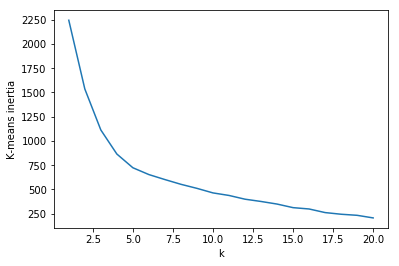

In [11]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

USstates_data = pd.concat([UScrimes,USqol,USlm], axis=1)
USstates_clustering = StandardScaler().fit_transform(USstates_data.drop('State',1))

numK=20
plt_data_x=np.zeros(numK)
plt_data_y=np.zeros(numK)

for k in range (1, numK+1):
 
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(USstates_clustering)
 
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
        
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    
    plt_data_x[k-1]=k
    plt_data_y[k-1]=interia

fig, ax = plt.subplots()
ax.plot(plt_data_x, plt_data_y)

ax.set(xlabel='k', ylabel='K-means inertia')
plt.show()

In [12]:
USstates_data = pd.concat([UScrimes,USqol,USlm], axis=1)
USstates_clustering = StandardScaler().fit_transform(USstates_data.drop('State',1))

# run k-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(USstates_clustering)
#kmeans = KMeans(init = "k-means++", n_clusters = 5, n_init = 10).fit(USstates_clustering)
kmeans_states_centers = kmeans.cluster_centers_

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:51] 

USstates_clusters=pd.DataFrame(USstates_data['State'])
USstates_clusters.insert(1, 'Cluster Labels', kmeans.labels_)
USstates_clusters

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,State,Cluster Labels
0,Alabama,4
1,Alaska,0
2,Arizona,4
3,Arkansas,4
4,California,1
5,Colorado,0
6,Connecticut,0
7,Delaware,0
8,District of Columbia,3
9,Florida,1


### Visualize clusters on map

In [13]:
# create map
map_states_clusters = folium.Map(location=[37.0902,-95.7129], zoom_start=3, tiles="OpenStreetMap")

import urllib
#json_url = urlopen("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json")
json_url = urlopen("https://raw.githubusercontent.com/ringtape/Coursera_Capstone/master/us-states.json")
US_geo = json.loads(json_url.read().decode('utf-8'))
threshold_scale = np.linspace(0,5,6, dtype=int)
threshold_scale = threshold_scale.tolist()
map_states_clusters.choropleth(
 geo_data=US_geo,
 name='choropleth',
 data=USstates_clusters,
 columns=['State', 'Cluster Labels'],
 key_on='feature.properties.name',
 threshold_scale=threshold_scale,
 fill_color='PuBu',
 fill_opacity=0.7,
 line_opacity=0.3,
 legend_name='Cluster Number',
 reset=True
)
#folium.Marker([table.iloc[32]['Latitude'], table.iloc[32]['Longitude']], popup=folium.Popup(str(table.iloc[32]['State']), parse_html=True)).add_to(map_states_clusters)

map_states_clusters

### Load and Analyze Food-Industry Data from BLS

#### (A) Extract Data directly from BLS that are relevant for the business model of "Dadadon".

In [14]:
fishsea_mkt_raw=pd.read_csv('https://data.bls.gov/cew/data/api/2017/a/industry/42446.csv') # Fish and seafood merchant wholesalers
fishsea_mkt=procBLSraw(fishsea_mkt_raw,area_fips)
print('Fish/Seafood Wholesalers data processed!')
# afg_mkt_raw=pd.read_csv('http://www.bls.gov/cew/data/api/2017/a/industry/11.csv') # Agricultural, fisheries, hunting
# afg_mkt=procBLSraw(afg_mkt_raw,area_fips)
# print('AFG data processed!')
meat_mkt_raw=pd.read_csv('http://www.bls.gov/cew/data/api/2017/a/industry/42447.csv') # Meat and meat product merchant wholesalers
meat_mkt=procBLSraw(meat_mkt_raw,area_fips)
print('Meat Wholesalers data processed!')
fruitveg_mkt_raw=pd.read_csv('http://www.bls.gov/cew/data/api/2017/a/industry/42448.csv') # Fruit and vegetable merchant wholesalers
fruitveg_mkt=procBLSraw(fruitveg_mkt_raw,area_fips)
print('Fruit/Vegetable Wholesalers data processed!')
grain_mkt_raw=pd.read_csv('http://www.bls.gov/cew/data/api/2017/a/industry/42451.csv') # Grain and field bean merchant wholesalers
grain_mkt=procBLSraw(grain_mkt_raw,area_fips)
print('Grain/Bean Wholesaler data processed!')
alcohol_mkt_raw=pd.read_csv('http://www.bls.gov/cew/data/api/2017/a/industry/4248.csv') # Alcoholic beverage merchant wholesalers
alcohol_mkt=procBLSraw(alcohol_mkt_raw,area_fips)
print('Alcoholic Wholesalers data processed!')

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Fish/Seafood Wholesalers data processed!
Meat Wholesalers data processed!
Fruit/Vegetable Wholesalers data processed!
Grain/Bean Wholesaler data processed!
Alcoholic Wholesalers data processed!


#### (B) This time the data are incomplete as some states support little to no wholesale businesses. We reorganize all Data, merge and order them by total wages.

In [15]:
def org_extr_totalwages(data_unorg,area_fips_data):
    dic = {'total_wages':[0]*51,'State':area_fips_data['State']}
    data_new=pd.DataFrame(dic)
    data_new['total_wages']=data_new['total_wages'].astype(float)
    for j in range(51):
        for k in range(51):
            if data_new.State.iloc[j]==data_unorg.State.iloc[k]:
                data_new.State.iloc[j]=data_unorg.State.iloc[k]
                data_new.total_wages.iloc[j]=data_unorg.total_annual_wages.iloc[k]
                break
    return data_new

def org_extr_totalemploy(data_unorg,area_fips_data):
    dic = {'avg_emplvl':[0]*51,'State':area_fips_data['State']}
    data_new=pd.DataFrame(dic)
    data_new['avg_emplvl']=data_new['avg_emplvl'].astype(float)
    for j in range(51):
        for k in range(51):
            if data_new.State.iloc[j]==data_unorg.State.iloc[k]:
                data_new.State.iloc[j]=data_unorg.State.iloc[k]
                data_new.avg_emplvl.iloc[j]=data_unorg.annual_avg_emplvl.iloc[k]
                break
    return data_new

# Reorganize data
fishsea_mkt_new=org_extr_totalwages(fishsea_mkt,area_fips)
# afg_mkt_new=org_extr_totalwages(afg_mkt,area_fips)
meat_mkt_new=org_extr_totalwages(meat_mkt,area_fips)
fruitveg_mkt_new=org_extr_totalwages(fruitveg_mkt,area_fips)
grain_mkt_new=org_extr_totalwages(grain_mkt,area_fips)
alcohol_mkt_new=org_extr_totalwages(alcohol_mkt,area_fips)
fishsea_mkt_new2=org_extr_totalemploy(fishsea_mkt,area_fips)
# afg_mkt_new2=org_extr_totalemploy(afg_mkt,area_fips)
meat_mkt_new2=org_extr_totalemploy(meat_mkt,area_fips)
fruitveg_mkt_new2=org_extr_totalemploy(fruitveg_mkt,area_fips)
grain_mkt_new2=org_extr_totalemploy(grain_mkt,area_fips)
alcohol_mkt_new2=org_extr_totalemploy(alcohol_mkt,area_fips)

In [16]:
# Merge and sort data
# USfood=pd.concat([afg_mkt_new,fishsea_mkt_new.drop('State',1),meat_mkt_new.drop('State',1),fruitveg_mkt_new.drop('State',1),\
#                grain_mkt_new.drop('State',1),alcohol_mkt_new.drop('State',1)], axis=1)
USfood=pd.concat([fishsea_mkt_new,meat_mkt_new.drop('State',1),fruitveg_mkt_new.drop('State',1),\
               grain_mkt_new.drop('State',1),alcohol_mkt_new.drop('State',1)], axis=1)
USfood['Grand Total Annual Wages']=USfood.sum(axis=1)
USfood=USfood[['State', 'Grand Total Annual Wages']].copy()


# USfood2=pd.concat([afg_mkt_new2,fishsea_mkt_new2.drop('State',1),meat_mkt_new2.drop('State',1),fruitveg_mkt_new2.drop('State',1),\
#                grain_mkt_new2.drop('State',1),alcohol_mkt_new2.drop('State',1)], axis=1)
USfood2=pd.concat([fishsea_mkt_new2,meat_mkt_new2.drop('State',1),fruitveg_mkt_new2.drop('State',1),\
               grain_mkt_new2.drop('State',1),alcohol_mkt_new2.drop('State',1)], axis=1)
USfood2['Total Average Employment']=USfood2.sum(axis=1)
USfood2=USfood2[['State', 'Total Average Employment']].copy()

USfood_pc=USfood
USfood_pc['Grand Total Annual Wages']=USfood_pc['Grand Total Annual Wages']/USfood2['Total Average Employment']
USfood_pc.rename(columns={'Grand Total Annual Wages':'Grand Total Wages Per Capita'}, 
                 inplace=True)
USfood_pc=USfood_pc.sort_values(by=['Grand Total Wages Per Capita'], ascending=False)

#### (C) Visualize Grand Total Wages Per Capita with a bar chart

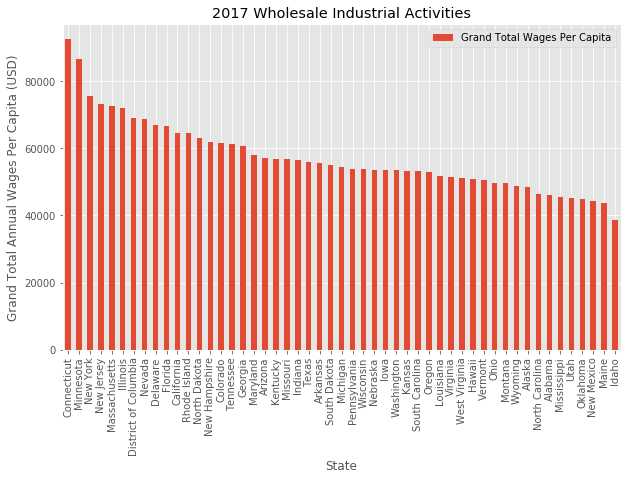

In [17]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style


USfood_plt=USfood_pc.set_index(['State'])
USfood_plt.plot(kind='bar', figsize=(10, 6))

plt.xlabel('State') # add to x-label to the plot
plt.ylabel('Grand Total Annual Wages Per Capita (USD)') # add y-label to the plot
plt.title('2017 Wholesale Industrial Activities') # add title to the plot

plt.show()

### Find the states similar to NY and order these candidates in descending order of Agricultural, Fisheries, Hunting and Wholesale Industrial thrive

In [18]:
set123=USstates_clusters.loc[USstates_clusters['Cluster Labels'] == USstates_clusters['Cluster Labels'].iloc[32]]
dic = {'grand_total_wages':[0]*len(set123),'State':set123['State'], 'Latitude':[0]*len(set123), 'Longitude':[0]*len(set123)}
USfood123=pd.DataFrame(dic)
for j in range(len(set123)):
    for k in range(len(USfood)):
        if USfood123.State.iloc[j] == USfood_pc.State.iloc[k]:
            USfood123.grand_total_wages.iloc[j] = USfood_pc['Grand Total Wages Per Capita'].iloc[k]
for j in range(len(set123)):
    for k in range(len(table)):
        if USfood123.State.iloc[j] == table.State.iloc[k]:
            USfood123.Latitude.iloc[j] = table['Latitude'].iloc[k]
            USfood123.Longitude.iloc[j] = table['Longitude'].iloc[k]
USoptions=USfood123.sort_values(by=['grand_total_wages'], ascending=False)
#USoptions=USoptions.loc[USoptions['grand_total_wages']>47000]
USoptions.reset_index(drop=True,inplace=True)

In [19]:
USoptions

,grand_total_wages,State,Latitude,Longitude
0,75515.389045,New York,42.165726,-74.948051
1,72086.179302,Illinois,40.349457,-88.986137
2,60661.811870,Georgia,33.040619,-83.643074
3,57987.957733,Maryland,39.063946,-76.802101
4,56664.263173,Missouri,38.456085,-92.288368
5,54452.759950,Michigan,43.326618,-84.536095
6,53865.813479,Pennsylvania,40.590752,-77.209755
7,53435.880372,Washington,47.400902,-121.490494
8,51512.193936,Virginia,37.769337,-78.169968
9,49638.184932,Ohio,40.388783,-82.764915


### Turns out that New York has the strongest wholesaler market force in cluster 2. The next step is to choose the next strongest state. At first glance Illinois seems to be the obvious choice. However, after taking recent financial reports into account, the more sensible choice should be either **Georgia** or **Maryland**. (See report for more details)

In [20]:
# create map
map_options = folium.Map(location=[37.0902,-95.7129], zoom_start=3, tiles="OpenStreetMap")

# set color scheme for the clusters

# add markers to the map
markers_colors = []
folium.CircleMarker(
        [USoptions['Latitude'].iloc[2], USoptions['Longitude'].iloc[2]],
        radius=10,
        color='green',
        fill=True,
        fill_color=1,
        fill_opacity=1).add_to(map_options)
folium.CircleMarker(
        [USoptions['Latitude'].iloc[1], USoptions['Longitude'].iloc[1]],
        radius=8,
        color='red',
        fill=True,
        fill_color=1,
        fill_opacity=1).add_to(map_options)
folium.CircleMarker(
        [USoptions['Latitude'].iloc[3], USoptions['Longitude'].iloc[3]],
        radius=10,
        color='green',
        fill=True,
        fill_color=1,
        fill_opacity=1).add_to(map_options)
for lat, lon, poi in zip(USoptions['Latitude'], USoptions['Longitude'], USoptions['State']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color=0.7,
        fill_opacity=0.7).add_to(map_options)
folium.Marker([40.7128, -74.0060], popup=folium.Popup('Dadadon, New York City', parse_html=True)).add_to(map_options)

map_options